# Map of 'Gyudon-ya' in Japan

*@rikipafe, August 20 2015*

### Install pre-requisite requirements.
[http://matplotlib.org/basemap/users/installing.html]

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## Loading The OpenStreetMap Data with Pandas

* [Open Street Map](http://openstreetmap.org).
* [OSM-x-tractor](http://osm-x-tractor.org/Data.aspx)

In [22]:
import pandas as pd
data = pd.read_csv('POIWorld.csv', nrows=5)
data.columns

Index([u'﻿"osmid"', u'name', u'amenity', u'emergency', u'historic', u'leisure', u'man_made', u'office', u'shop', u'sport', u'tourism', u'craft', u'Longitude', u'Latitude'], dtype='object')

In [27]:
columns = ["name", "Longitude", "Latitude"]
data = pd.read_csv('POIWorld.csv', usecols=columns)
data.head()

,name,Longitude,Latitude
0,NaN,-0.206980,51.945875
1,NaN,-0.268633,51.938183
2,NaN,-0.274278,51.930210
3,NaN,-0.262108,51.851700
4,NaN,-0.112959,51.899246


In [28]:
with_name = data[data.name.notnull()]

In [29]:
with_name.name.value_counts().head(50)

Saarijärven moottorikelkkareitit                   25692
McDonald's                                          8856
Subway                                              7760
Shell                                               6743
Сбербанк                                            6134
Продукты                                            5156
7-Eleven                                            4603
Starbucks                                           4180
Sparkasse                                           4134
セブン-イレブン                                            3468
Burger King                                         3384
KFC                                                 3081
Lidl                                                2911
Магнит                                              2829
Esso                                                2820
К-150                                               2592
ファミリーマート                                            2486
Spar                           

In [17]:
convenience = with_name[with_name.shop.str.contains('convenience')]

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def draw_JPN():
    """initialize a basemap centered on the continental JPN"""
    plt.figure(figsize=(16, 16))
    return Basemap(projection='lcc', resolution='l',
                   llcrnrlon=45, urcrnrlon=165,
                   llcrnrlat=0, urcrnrlat=65,
                   lat_1=32, lon_0=105,
                   area_thresh=10000)

In [19]:
def plot_inJPN(store,label,color):
    m = draw_JPN()

    # Draw map background
    m.fillcontinents(color='white', lake_color='#eeeeee')
    m.drawstates(color='lightgray')
    m.drawcoastlines(color='lightgray')
    m.drawcountries(color='lightgray')
    m.drawmapboundary(fill_color='#eeeeee')

    # Plot the values
    style = dict(s=2, marker='o', alpha=0.5, zorder=2)
    m.scatter(store.Longitude.values,
              store.Latitude.values, latlon=True,
              label=label,
              color=color, **style)
    plt.legend(loc='lower right', frameon=False);
    plt.savefig('hoge.png')

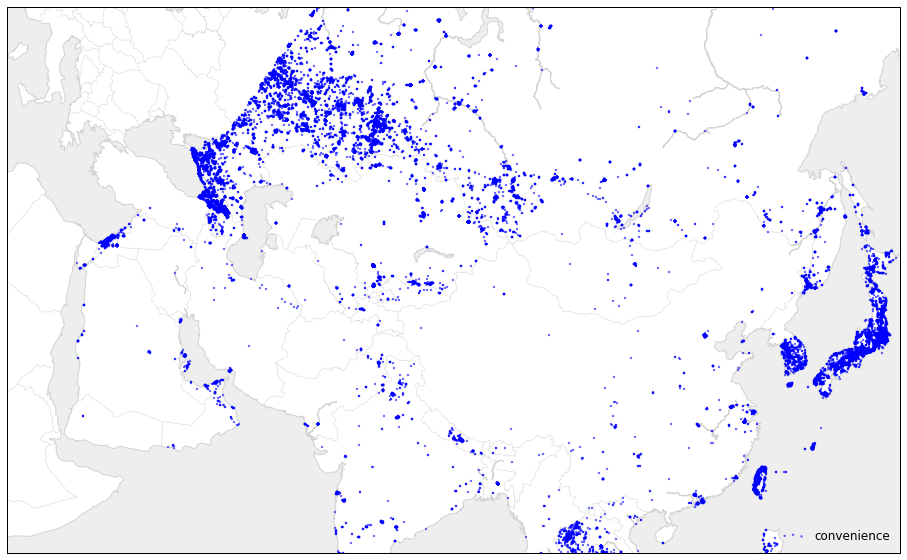

In [20]:
plot_inJPN(convenience,'convenience','blue')